# Importing necessary libraries

In [225]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [226]:
df = pd.read_csv('/content/readmissions.csv')
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


# Exploring Dataset

## Checking shape of dataset

In [227]:
df.shape

(25000, 65)

## Getting info of dataset

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  bool 
 9   race_AfricanAmerican                      25000 non-null  bool 
 10  gender_Female                             25000 non-null  

## Converting all Boolean values to integer values

In [229]:
df *= 1
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,1,0,...,1,1,1,1,1,1,1,1,1,0
1,2,30,0,12,0,0,1,9,1,0,...,1,0,1,1,1,1,1,0,1,1
2,5,66,0,22,1,0,2,9,1,0,...,1,1,1,1,1,1,1,1,1,1
3,3,63,0,8,0,0,0,8,1,0,...,1,1,1,1,1,1,1,1,1,1
4,5,40,0,6,0,0,1,9,1,0,...,1,1,1,1,1,1,1,1,0,0


## Plotting the correlation matrix

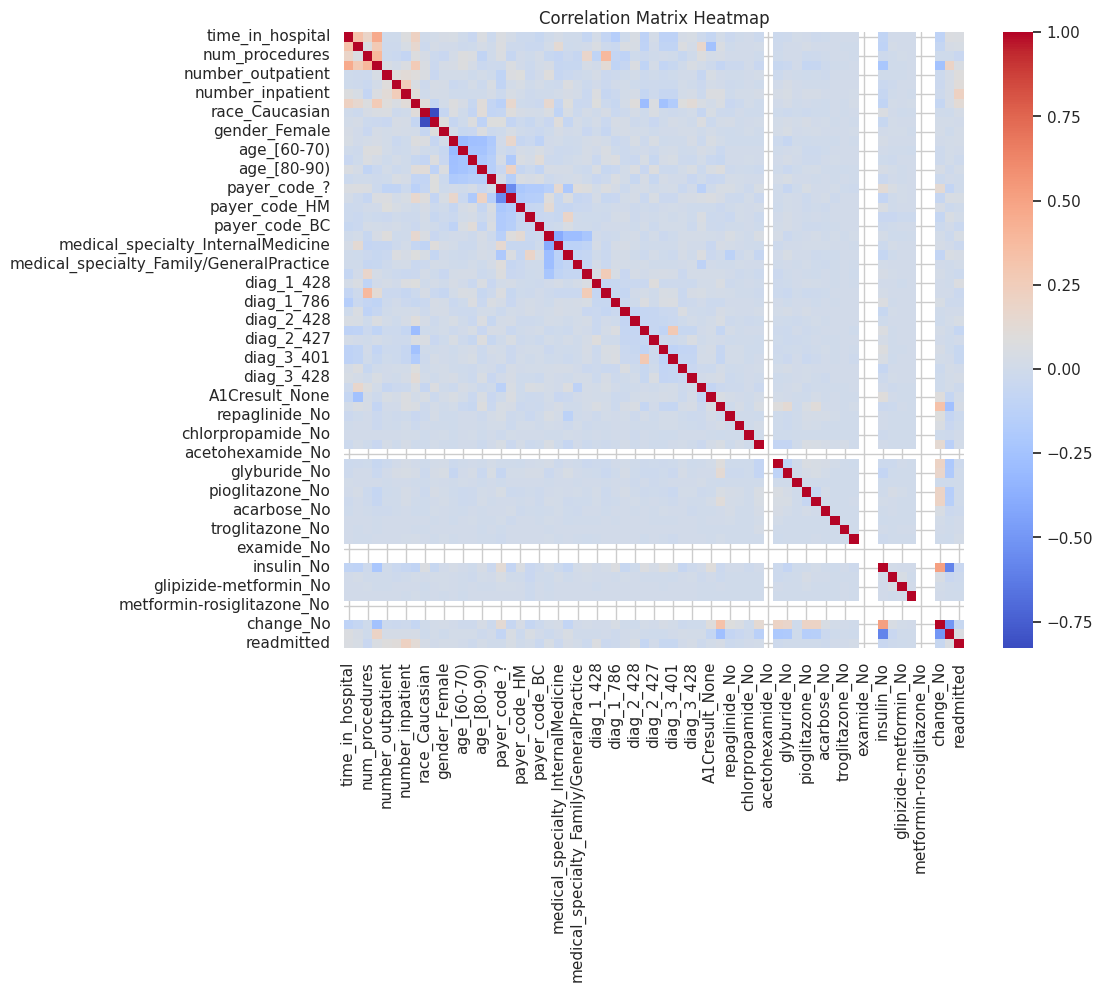

In [230]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Dropping any possible null values

In [231]:
df = df.dropna()
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,1,0,...,1,1,1,1,1,1,1,1,1,0
1,2,30,0,12,0,0,1,9,1,0,...,1,0,1,1,1,1,1,0,1,1
2,5,66,0,22,1,0,2,9,1,0,...,1,1,1,1,1,1,1,1,1,1
3,3,63,0,8,0,0,0,8,1,0,...,1,1,1,1,1,1,1,1,1,1
4,5,40,0,6,0,0,1,9,1,0,...,1,1,1,1,1,1,1,1,0,0


# Preparing the dataset

## Extracting features and target from the dataset

In [232]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']

## Visualizing the features using PCA

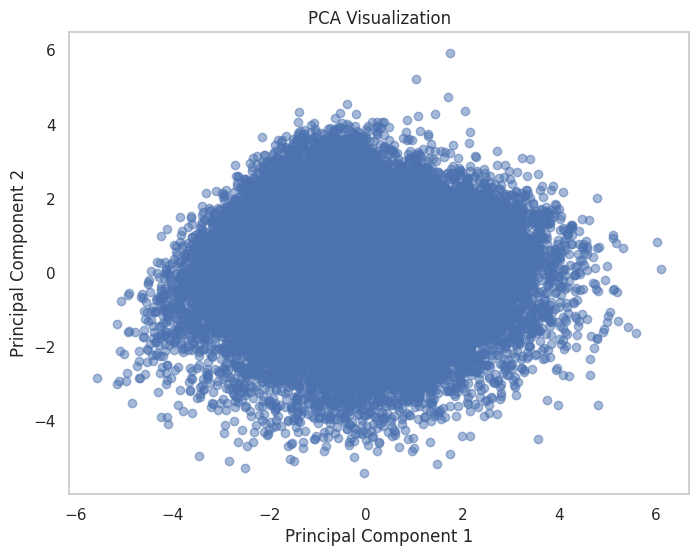

In [233]:
scaler = StandardScaler()
X_vis = scaler.fit_transform(X)

n_components = 2
pca = PCA(n_components=n_components)
X_vis = pca.fit_transform(X_vis)

plt.figure(figsize=(8, 6))
plt.scatter(X_vis[:,0], X_vis[:,1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.grid()
plt.show()

## Splitting the dataset into Training, Testing and Validation dataset

In [234]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model Training

## Initializing the model

In [235]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Compiling the model

In [236]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training

In [237]:
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_val, y_val), verbose=0)

## Plotting the Training and Validation losses

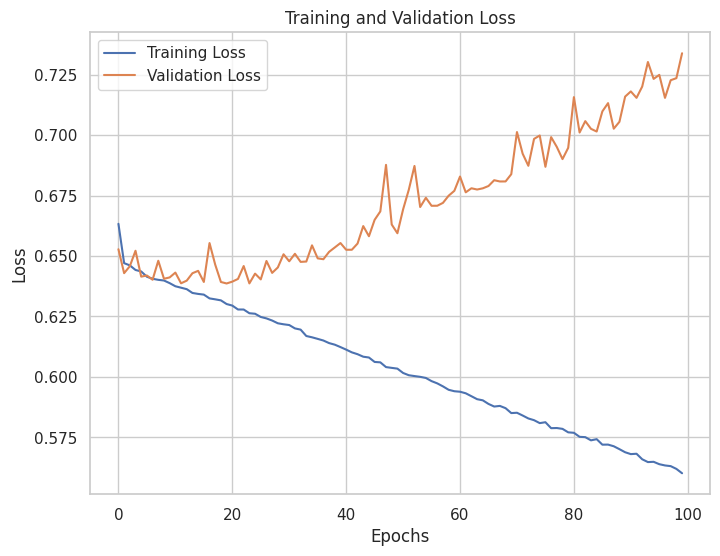

In [238]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Model Evaluation

In [239]:
_, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: ", accuracy)

118/118 [==============================] - 0s 2ms/step - loss: 0.7325 - accuracy: 0.6067
Test Accuracy:  0.6066666841506958


## Predicting binary output values from model output

In [240]:
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

118/118 [==============================] - 0s 2ms/step


## Visualizing model results

In [241]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

Accuracy: 0.6066666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.74      0.67      2011
           1       0.60      0.45      0.52      1739

    accuracy                           0.61      3750
   macro avg       0.61      0.60      0.59      3750
weighted avg       0.61      0.61      0.60      3750



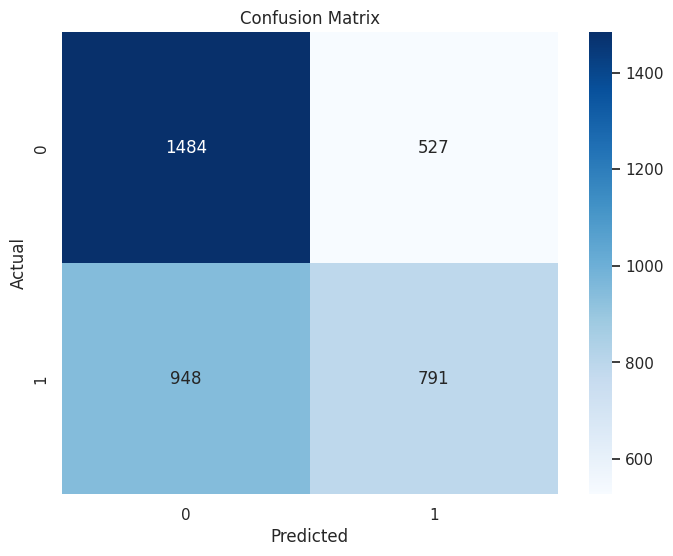

In [242]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()